In [ ]:
## 회귀분석


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("kaggle_boston_price.csv")

In [2]:
df.head()

,TOWN,LON,LAT,CMEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,Nahant,-70.955,42.2550,24.0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,Swampscott,-70.950,42.2875,21.6,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,Swampscott,-70.936,42.2830,34.7,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,Marblehead,-70.928,42.2930,33.4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,Marblehead,-70.922,42.2980,36.2,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [3]:
df.columns

Index(['TOWN', 'LON', 'LAT', 'CMEDV', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX',
       'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [4]:
cols = list(df.columns[3:])
df = df.loc[:,cols]
df.head()

,CMEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,21.6,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,34.7,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,33.4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,36.2,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [5]:
X_rooms = df["RM"].values
type(X_rooms)


numpy.ndarray

In [7]:
y = df["CMEDV"].values

In [8]:
X_rooms.shape, y.shape

((506,), (506,))

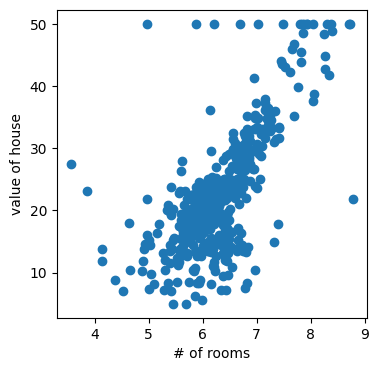

In [10]:
#얼마나 영향을 미칠까
plt.figure(figsize=(4,4))
plt.scatter(X_rooms, y)
plt.xlabel("# of rooms")
plt.ylabel("value of house")
plt.show()

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
regression = LinearRegression()
regression.fit(X_rooms, y)

ValueError: Expected 2D array, got 1D array instead:
array=[6.575 6.421 7.185 6.998 7.147 6.43  6.012 6.172 5.631 6.004 6.377 6.009
 5.889 5.949 6.096 5.834 5.935 5.99  5.456 5.727 5.57  5.965 6.142 5.813
 5.924 5.599 5.813 6.047 6.495 6.674 5.713 6.072 5.95  5.701 6.096 5.933
 5.841 5.85  5.966 6.595 7.024 6.77  6.169 6.211 6.069 5.682 5.786 6.03
 5.399 5.602 5.963 6.115 6.511 5.998 5.888 7.249 6.383 6.816 6.145 5.927
 5.741 5.966 6.456 6.762 7.104 6.29  5.787 5.878 5.594 5.885 6.417 5.961
 6.065 6.245 6.273 6.286 6.279 6.14  6.232 5.874 6.727 6.619 6.302 6.167
 6.389 6.63  6.015 6.121 7.007 7.079 6.417 6.405 6.442 6.211 6.249 6.625
 6.163 8.069 7.82  7.416 6.727 6.781 6.405 6.137 6.167 5.851 5.836 6.127
 6.474 6.229 6.195 6.715 5.913 6.092 6.254 5.928 6.176 6.021 5.872 5.731
 5.87  6.004 5.961 5.856 5.879 5.986 5.613 5.693 6.431 5.637 6.458 6.326
 6.372 5.822 5.757 6.335 5.942 6.454 5.857 6.151 6.174 5.019 5.403 5.468
 4.903 6.13  5.628 4.926 5.186 5.597 6.122 5.404 5.012 5.709 6.129 6.152
 5.272 6.943 6.066 6.51  6.25  7.489 7.802 8.375 5.854 6.101 7.929 5.877
 6.319 6.402 5.875 5.88  5.572 6.416 5.859 6.546 6.02  6.315 6.86  6.98
 7.765 6.144 7.155 6.563 5.604 6.153 7.831 6.782 6.556 7.185 6.951 6.739
 7.178 6.8   6.604 7.875 7.287 7.107 7.274 6.975 7.135 6.162 7.61  7.853
 8.034 5.891 6.326 5.783 6.064 5.344 5.96  5.404 5.807 6.375 5.412 6.182
 5.888 6.642 5.951 6.373 6.951 6.164 6.879 6.618 8.266 8.725 8.04  7.163
 7.686 6.552 5.981 7.412 8.337 8.247 6.726 6.086 6.631 7.358 6.481 6.606
 6.897 6.095 6.358 6.393 5.593 5.605 6.108 6.226 6.433 6.718 6.487 6.438
 6.957 8.259 6.108 5.876 7.454 8.704 7.333 6.842 7.203 7.52  8.398 7.327
 7.206 5.56  7.014 8.297 7.47  5.92  5.856 6.24  6.538 7.691 6.758 6.854
 7.267 6.826 6.482 6.812 7.82  6.968 7.645 7.923 7.088 6.453 6.23  6.209
 6.315 6.565 6.861 7.148 6.63  6.127 6.009 6.678 6.549 5.79  6.345 7.041
 6.871 6.59  6.495 6.982 7.236 6.616 7.42  6.849 6.635 5.972 4.973 6.122
 6.023 6.266 6.567 5.705 5.914 5.782 6.382 6.113 6.426 6.376 6.041 5.708
 6.415 6.431 6.312 6.083 5.868 6.333 6.144 5.706 6.031 6.316 6.31  6.037
 5.869 5.895 6.059 5.985 5.968 7.241 6.54  6.696 6.874 6.014 5.898 6.516
 6.635 6.939 6.49  6.579 5.884 6.728 5.663 5.936 6.212 6.395 6.127 6.112
 6.398 6.251 5.362 5.803 8.78  3.561 4.963 3.863 4.97  6.683 7.016 6.216
 5.875 4.906 4.138 7.313 6.649 6.794 6.38  6.223 6.968 6.545 5.536 5.52
 4.368 5.277 4.652 5.    4.88  5.39  5.713 6.051 5.036 6.193 5.887 6.471
 6.405 5.747 5.453 5.852 5.987 6.343 6.404 5.349 5.531 5.683 4.138 5.608
 5.617 6.852 5.757 6.657 4.628 5.155 4.519 6.434 6.782 5.304 5.957 6.824
 6.411 6.006 5.648 6.103 5.565 5.896 5.837 6.202 6.193 6.38  6.348 6.833
 6.425 6.436 6.208 6.629 6.461 6.152 5.935 5.627 5.818 6.406 6.219 6.485
 5.854 6.459 6.341 6.251 6.185 6.417 6.749 6.655 6.297 7.393 6.728 6.525
 5.976 5.936 6.301 6.081 6.701 6.376 6.317 6.513 6.209 5.759 5.952 6.003
 5.926 5.713 6.167 6.229 6.437 6.98  5.427 6.162 6.484 5.304 6.185 6.229
 6.242 6.75  7.061 5.762 5.871 6.312 6.114 5.905 5.454 5.414 5.093 5.983
 5.983 5.707 5.926 5.67  5.39  5.794 6.019 5.569 6.027 6.593 6.12  6.976
 6.794 6.03 ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [13]:
X_rooms

array([6.575, 6.421, 7.185, 6.998, 7.147, 6.43 , 6.012, 6.172, 5.631,
       6.004, 6.377, 6.009, 5.889, 5.949, 6.096, 5.834, 5.935, 5.99 ,
       5.456, 5.727, 5.57 , 5.965, 6.142, 5.813, 5.924, 5.599, 5.813,
       6.047, 6.495, 6.674, 5.713, 6.072, 5.95 , 5.701, 6.096, 5.933,
       5.841, 5.85 , 5.966, 6.595, 7.024, 6.77 , 6.169, 6.211, 6.069,
       5.682, 5.786, 6.03 , 5.399, 5.602, 5.963, 6.115, 6.511, 5.998,
       5.888, 7.249, 6.383, 6.816, 6.145, 5.927, 5.741, 5.966, 6.456,
       6.762, 7.104, 6.29 , 5.787, 5.878, 5.594, 5.885, 6.417, 5.961,
       6.065, 6.245, 6.273, 6.286, 6.279, 6.14 , 6.232, 5.874, 6.727,
       6.619, 6.302, 6.167, 6.389, 6.63 , 6.015, 6.121, 7.007, 7.079,
       6.417, 6.405, 6.442, 6.211, 6.249, 6.625, 6.163, 8.069, 7.82 ,
       7.416, 6.727, 6.781, 6.405, 6.137, 6.167, 5.851, 5.836, 6.127,
       6.474, 6.229, 6.195, 6.715, 5.913, 6.092, 6.254, 5.928, 6.176,
       6.021, 5.872, 5.731, 5.87 , 6.004, 5.961, 5.856, 5.879, 5.986,
       5.613, 5.693,

In [14]:
X_rooms = X_rooms.reshape(-1, 1)
X_rooms

array([[6.575],
       [6.421],
       [7.185],
       [6.998],
       [7.147],
       [6.43 ],
       [6.012],
       [6.172],
       [5.631],
       [6.004],
       [6.377],
       [6.009],
       [5.889],
       [5.949],
       [6.096],
       [5.834],
       [5.935],
       [5.99 ],
       [5.456],
       [5.727],
       [5.57 ],
       [5.965],
       [6.142],
       [5.813],
       [5.924],
       [5.599],
       [5.813],
       [6.047],
       [6.495],
       [6.674],
       [5.713],
       [6.072],
       [5.95 ],
       [5.701],
       [6.096],
       [5.933],
       [5.841],
       [5.85 ],
       [5.966],
       [6.595],
       [7.024],
       [6.77 ],
       [6.169],
       [6.211],
       [6.069],
       [5.682],
       [5.786],
       [6.03 ],
       [5.399],
       [5.602],
       [5.963],
       [6.115],
       [6.511],
       [5.998],
       [5.888],
       [7.249],
       [6.383],
       [6.816],
       [6.145],
       [5.927],
       [5.741],
       [5.966],
       [

In [15]:
y = y.reshape(-1, 1)
y

array([[24. ],
       [21.6],
       [34.7],
       [33.4],
       [36.2],
       [28.7],
       [22.9],
       [22.1],
       [16.5],
       [18.9],
       [15. ],
       [18.9],
       [21.7],
       [20.4],
       [18.2],
       [19.9],
       [23.1],
       [17.5],
       [20.2],
       [18.2],
       [13.6],
       [19.6],
       [15.2],
       [14.5],
       [15.6],
       [13.9],
       [16.6],
       [14.8],
       [18.4],
       [21. ],
       [12.7],
       [14.5],
       [13.2],
       [13.1],
       [13.5],
       [18.9],
       [20. ],
       [21. ],
       [24.2],
       [30.8],
       [34.9],
       [26.6],
       [25.3],
       [24.7],
       [21.2],
       [19.3],
       [20. ],
       [16.6],
       [14.4],
       [19.4],
       [19.7],
       [20.5],
       [25. ],
       [23.4],
       [18.9],
       [35.4],
       [24.7],
       [31.6],
       [23.3],
       [19.6],
       [18.7],
       [16. ],
       [22.2],
       [25. ],
       [33. ],
       [23.5],
       [19

In [16]:
regression = LinearRegression()
regression.fit(X_rooms, y)

LinearRegression()

In [17]:
test_data = np.linspace(min(X_rooms), max(X_rooms))


In [18]:
y_pred = regression.predict(test_data)
print(y_pred)

[[-2.25531945]
 [-1.28611178]
 [-0.31690411]
 [ 0.65230357]
 [ 1.62151124]
 [ 2.59071891]
 [ 3.55992658]
 [ 4.52913426]
 [ 5.49834193]
 [ 6.4675496 ]
 [ 7.43675728]
 [ 8.40596495]
 [ 9.37517262]
 [10.34438029]
 [11.31358797]
 [12.28279564]
 [13.25200331]
 [14.22121099]
 [15.19041866]
 [16.15962633]
 [17.128834  ]
 [18.09804168]
 [19.06724935]
 [20.03645702]
 [21.0056647 ]
 [21.97487237]
 [22.94408004]
 [23.91328772]
 [24.88249539]
 [25.85170306]
 [26.82091073]
 [27.79011841]
 [28.75932608]
 [29.72853375]
 [30.69774143]
 [31.6669491 ]
 [32.63615677]
 [33.60536444]
 [34.57457212]
 [35.54377979]
 [36.51298746]
 [37.48219514]
 [38.45140281]
 [39.42061048]
 [40.38981815]
 [41.35902583]
 [42.3282335 ]
 [43.29744117]
 [44.26664885]
 [45.23585652]]


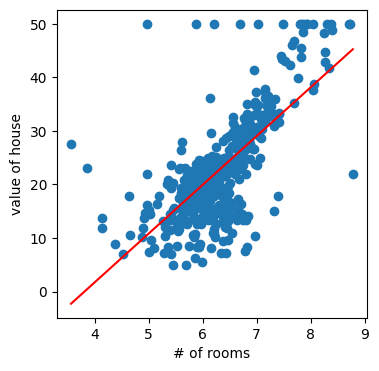

In [19]:
plt.figure(figsize=(4,4))
plt.scatter(X_rooms, y)
plt.plot(test_data, y_pred, color='red')
plt.xlabel("# of rooms")
plt.ylabel("value of house")
plt.show()
#-> 선이 그어졌기때문에 인과성이 있는 데이터이다, Rooms가 y데이터에 영향을 미친다.

### 다중선형회귀분석

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split #전처리
from sklearn.linear_model import LinearRegression #모델
from sklearn import metrics #평가지표

In [21]:
df = pd.read_csv("kaggle_boston_price.csv")
df.head()

,TOWN,LON,LAT,CMEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,Nahant,-70.955,42.2550,24.0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,Swampscott,-70.950,42.2875,21.6,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,Swampscott,-70.936,42.2830,34.7,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,Marblehead,-70.928,42.2930,33.4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,Marblehead,-70.922,42.2980,36.2,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [22]:
cols = list(df.columns[3:])
df = df.loc[:,cols]
df.head()

,CMEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,21.6,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,34.7,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,33.4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,36.2,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [37]:
df.columns

Index(['CMEDV', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
       'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [70]:
cols_a = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
cols_b = ['CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'PTRATIO', 'B', 'LSTAT']

x_a = df.loc[:,cols_a]
x_b = df.loc[:,cols_b]

y = df.loc[:,"CMEDV"]

In [71]:
xa_train, xa_test, ya_train, ya_test = train_test_split(x_a, y, test_size=0.3, random_state=27)
xb_train, xb_test, yb_train, yb_test = train_test_split(x_b, y, test_size=0.3, random_state=27)

In [62]:
x_train.shape, y_train.shape

((354, 13), (354,))

In [ ]:
# model 객체 생성
# model 학습(fit)
# x_test --> model --> 예측(y_pred)
# metric : (1/n)(y_test - y_pred)*2

In [73]:
regression_a = LinearRegression()
regression_a.fit(xa_train, ya_train)
ya_pred = regression_a.predict(xa_test)
ya_pred.shape


regression_b = LinearRegression()
regression_b.fit(xb_train, yb_train)
yb_pred = regression_b.predict(xb_test)
yb_pred.shape

(152,)

In [74]:
mse_a = metrics.mean_squared_error(ya_test, ya_pred)
mae_a = metrics.mean_absolute_error(ya_test, ya_pred)
rmse_a = np.sqrt(mse_a)
mape_a = metrics.mean_absolute_percentage_error(ya_test, ya_pred)

mse_b = metrics.mean_squared_error(yb_test, yb_pred)
mae_b = metrics.mean_absolute_error(yb_test, yb_pred)
rmse_b = np.sqrt(mse)
mape_b = metrics.mean_absolute_percentage_error(yb_test, yb_pred)



print("MSE : ", round(mse_a, 3))
print("MAE : ", round(mae_a, 3))
print("RMSE : ", round(rmse_a, 3))
print("MAPE : ", round(mape_a, 3))
print("------------------------")
print("MSE : ", round(mse_b, 3))
print("MAE : ", round(mae_b, 3))
print("RMSE : ", round(rmse_b, 3))
print("MAPE : ", round(mape_b, 3))


MSE :  25.952
MAE :  3.383
RMSE :  5.094
MAPE :  0.193
------------------------
MSE :  26.458
MAE :  3.449
RMSE :  5.094
MAPE :  0.198


In [75]:
# 회귀계수 출력

weight_a = np.round(regression_a.coef_, 1)
print(weight_a)

weight_b = np.round(regression_b.coef_, 1)
print(weight_b)




[ -0.1   0.   -0.    3.4 -12.9   4.7  -0.   -1.4   0.3  -0.   -0.8   0.
  -0.4]
[ -0.1   0.    3.6 -16.8   4.8  -1.3   0.1  -0.9   0.   -0.5]


In [33]:
x.columns
# -12.9 값이 나온 NOX의 경우는 집값을 낮추는데 영향을 미치고, 4.7이 나온 RM이 집값을 높이는데 가장 큰 영향을 미친다

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [77]:
pd.Series(np.round(regression_a.coef_, 1), index=x_a.columns).sort_values(ascending=False)


RM          4.7
CHAS        3.4
RAD         0.3
INDUS      -0.0
ZN          0.0
B           0.0
TAX        -0.0
AGE        -0.0
CRIM       -0.1
LSTAT      -0.4
PTRATIO    -0.8
DIS        -1.4
NOX       -12.9
dtype: float64

In [79]:
pd.Series(np.round(regression_b.coef_, 1), index=x_b.columns).sort_values(ascending=False)

RM          4.8
CHAS        3.6
RAD         0.1
ZN          0.0
B           0.0
CRIM       -0.1
LSTAT      -0.5
PTRATIO    -0.9
DIS        -1.3
NOX       -16.8
dtype: float64

In [81]:
# Model은 잘 만들어 졌는가? 설명력 ==> R2

r2_score_a = regression_a.score(xa_train, ya_train)
test_r2_score_a = regression_a.score(xa_test, ya_test)

print(np.round(r2_score_a, 3), np.round(test_r2_score_a, 3))

r2_score_b = regression_b.score(xb_train, yb_train)
test_r2_score_b = regression_b.score(xb_test, yb_test)


print(np.round(r2_score_b, 3), np.round(test_r2_score_b, 3))


0.752 0.71
0.745 0.705


In [68]:
regression.intercept_

np.float64(23.884469236771363)

In [69]:
import statsmodels.api as sm

x_train = sm.add_constant(x_train)

# 통계 모델 생성 및 학습
model = sm.OLS(y_train, x_train).fit()

# 결과 요약 출력
print(model.summary())

# P>|t| p-value가 0.05이상인 값 INDUS, AGE 등은 유의하지않다

                            OLS Regression Results                            
Dep. Variable:                  CMEDV   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     79.17
Date:                Tue, 14 Jan 2025   Prob (F-statistic):           2.13e-94
Time:                        16:15:14   Log-Likelihood:                -1035.0
No. Observations:                 354   AIC:                             2098.
Df Residuals:                     340   BIC:                             2152.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         23.8845      6.107      3.911      0.0

In [82]:
xb_train = sm.add_constant(xb_train)

# 통계 모델 생성 및 학습
model = sm.OLS(yb_train, xb_train).fit()

# 결과 요약 출력
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  CMEDV   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     100.3
Date:                Tue, 14 Jan 2025   Prob (F-statistic):           1.68e-95
Time:                        16:41:23   Log-Likelihood:                -1039.5
No. Observations:                 354   AIC:                             2101.
Df Residuals:                     343   BIC:                             2144.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         23.0180      6.068      3.793      0.0

In [ ]:
# R-squared 값과, Adj. R-squared 값이 차이가 줄었기 때문에, 변수 제거에 의미가 있다

In [86]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF_Factor"] = [variance_inflation_factor(xb_train.values, i) for i in range(xb_train.shape[1])]
vif["features"] = xb_train.columns
vif

,VIF_Factor,features
0,607.114064,const
1,1.634668,CRIM
2,2.265935,ZN
3,1.046223,CHAS
4,3.655520,NOX
5,1.858074,RM
6,3.646792,DIS
7,2.819025,RAD
8,1.667917,PTRATIO
9,1.366580,B
